https://unimibfisicalaboratori.github.io/UnimibFisicaLabStatPythonWebBook/lectures/Lecture_10/EXERCISES.html

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import expon
from IPython.display import Latex

Basic functions:

In [168]:
def exp(tau):
    if tau != 0:
        return -tau*np.log(1-np.random.uniform())

In [169]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

In [170]:
def max(sample):    #Max of data
    m=sample[0]
    for i in sample:
        if i > m: m = i
    return m

def min(sample):
    m=sample[0]
    for i in sample:
        if i < m: m = i
    return m

In [171]:
def skewness(sample):

    m = np.average(sample)
    sk = 0
    for i in sample:

        sk += (i - m)**3
    
    return sk/((len(sample)-1)*(np.std(sample)**3))

<h1>Data</h1>
Generating Exponentially distributed Data

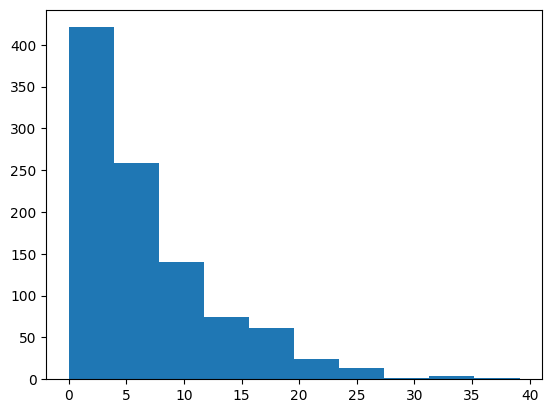

In [172]:
N = 1000
t0 = 7      #caratteristic time


dati = pdf(N,t0)


plt.hist(dati,bins=10)
plt.show()

<h1>Likelihood and LogLikelihood

Likelihood

In [173]:
def likelihood(dati,t):
    return np.prod([(np.exp(-i/t)/t) for i in dati])

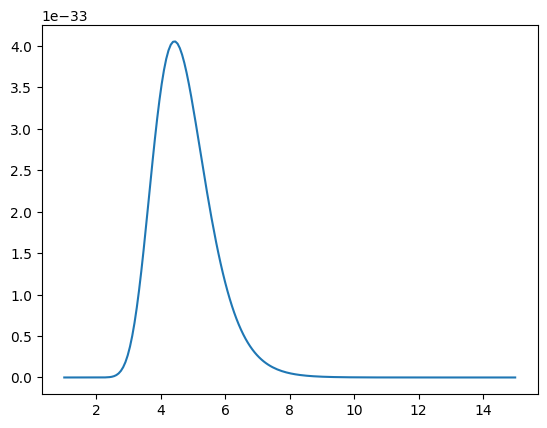

In [174]:
t_range = np.linspace(1,15,200) #range of t0 values


like = [likelihood(dati[:30],t) for t in t_range]


plt.plot(t_range,like)
plt.show()

Loglikelihood

In [175]:
def loglikelihood_Originale(dati,t):
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

In [176]:
def loglikelihood(dati,t):
    return np.sum([(-i/t)-np.log(t) for i in dati])

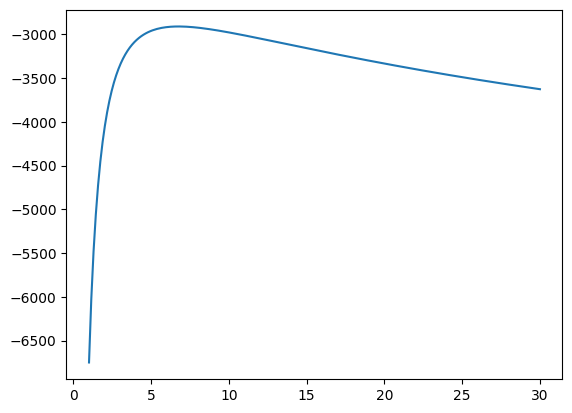

In [177]:
t_range = np.linspace(1,30,200) #range of t0 values
logLike = [loglikelihood(dati,t) for t in t_range]

plt.plot(t_range,logLike)
plt.show()

Comparing likelihoods with different data sizes

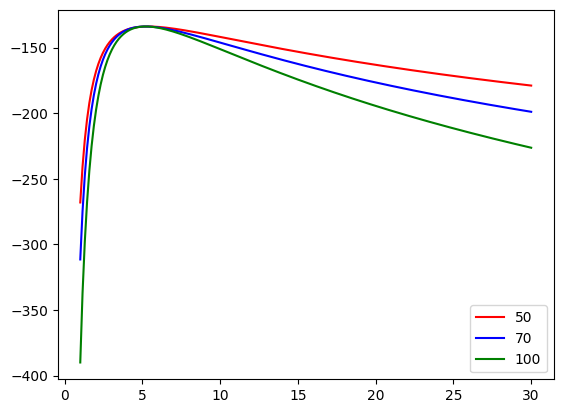

In [178]:
like1 = [loglikelihood(dati[:50],t) for t in t_range]
like2 = [loglikelihood(dati[:70],t) for t in t_range]
like3 = [loglikelihood(dati[:100],t) for t in t_range]

m1 = max(like1)
m2 = m1-max(like2)
m3 = m1-max(like3)

like2 = [i+m2 for i in like2]
like3 = [i+m3 for i in like3]

plt.plot(t_range,like1,c='red',label=50)
plt.plot(t_range,like2,c='blue',label=70)
plt.plot(t_range,like3,c='green',label=100)
plt.legend()
plt.show()

<h1>Finding Maximum

In [179]:
def max_sez_aurea(sample,func,t,prec=.001):

    r = (-1+np.sqrt(5))/2  #golden ratio

    xmin = min(t)
    xmax = max(t)

    while abs(xmax-xmin) > prec:

        a = xmin +     r* abs(xmax-xmin)
        b = xmin + (1-r)* abs(xmax-xmin)
        
        if func(sample,b) < func(sample,a):
            xmin = b
        else: 
            xmax = a

    return xmin,func(sample,xmin)

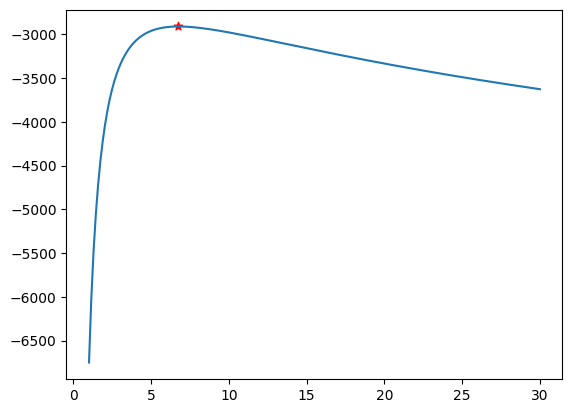

<IPython.core.display.Latex object>

In [180]:
l = [loglikelihood(dati,i) for i in t_range]

tau,y_max = max_sez_aurea(dati,loglikelihood,t_range)

plt.plot(t_range,l)
plt.scatter(tau,y_max,marker='*',c='red')
plt.show()
Latex(f"$$\\hat \\theta = {tau}$$")

**Comparing sum and product difference log likelihood**

In [181]:
t_range = np.linspace(2,15,200) #range of t0 values

In [182]:
def loglikelihoodProd(dati,t):
    
    a = np.prod([(np.exp(-i/t)/t) for i in dati])

    return np.log(a)

In [183]:
sum =   [loglikelihood(dati[:160],i) for i in t_range]

In [184]:
prod =  [loglikelihoodProd(dati[:160],j,) for j in t_range]

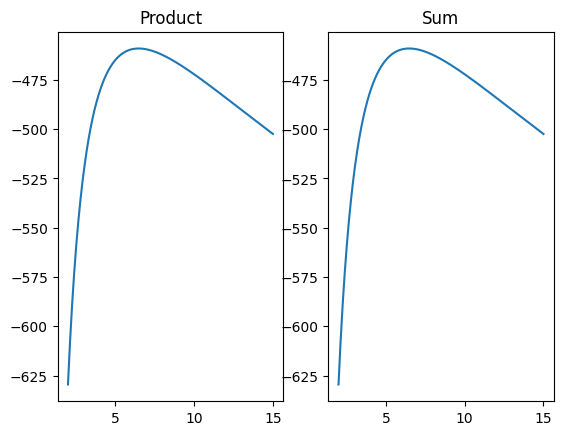

In [185]:
fig,ax = plt.subplots(1,2)

ax[0].plot(t_range,prod)
ax[0].set_title("Product")

ax[1].plot(t_range,sum)
ax[1].set_title("Sum")


plt.show()

**Finding Zeros**

In [186]:
def zeros(func,dati,xmin,xmax,prec=.001):
    
    x_max,yMax = max_sez_aurea(dati,func,t_range)
    
    a = xmin
    b = xmax

    mean = ((b-a)/2)+a

    while(abs(b-a) > prec):

        mean = ((b-a)/2)+a

        fa = (func(dati,a)-yMax+0.5)
        fb = (func(dati,mean)-yMax+0.5)

        if  fa*fb > 0:
            a = mean
        else:
            b = mean
        
    return mean

In [187]:
t_range = np.linspace(1,10,1000) #range of t0 values

x_max,y_max = max_sez_aurea(dati,loglikelihood,t_range)

l = [loglikelihood(dati,t)-y_max+0.5 for t in t_range]

z = zero1 , zero2 = zeros(loglikelihood,dati,1,x_max) , zeros(loglikelihood,dati,x_max,10)

sigma = zero2-x_max


In [188]:
Latex(f"$$\\hat \\theta = {x_max} \\newline \\hat \\theta - \\sigma_\\theta = {zero1} \\newline \\hat \\theta + \\sigma_\\theta = {zero2} \\newline \\sigma = {sigma}$$")

<IPython.core.display.Latex object>

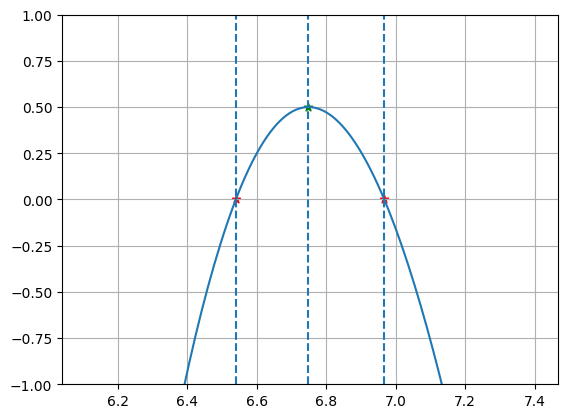

In [189]:
#plot the curve
plt.plot(t_range,l)
plt.scatter(z,(0,0),marker = '*',c='red')

#plot dots
plt.scatter(x_max,.5,marker = '*',c='green')

plt.vlines(x=[x_max,zero1,zero2],ymin=-1,ymax=1,linestyles='--')

plt.ylim(-1,1)
plt.xlim(zero1-.5,zero2+.5)
plt.grid(True)

In [190]:
Latex(f"$$\\hat \\theta = {x_max} \\newline t_0 = {t0}$$")

<IPython.core.display.Latex object>

**Normal distribution of estimated value**

In [191]:
t_range = np.linspace(1,15,100) #range of t0 values

In [192]:
def estimators(N=200,n=10):
    
    estims = np.zeros(N)
    for i in range(N):
        
        data = pdf(n,t0)
        tau = max_sez_aurea(data,loglikelihood,t_range)[0]
        
        estims[i] = (tau)
    
    return estims

In [193]:
estim_5 = estimators(n=5)
estim_10 = estimators(n=10)
estim_100 = estimators(n=100)
estim_1000 = estimators(n=1000)

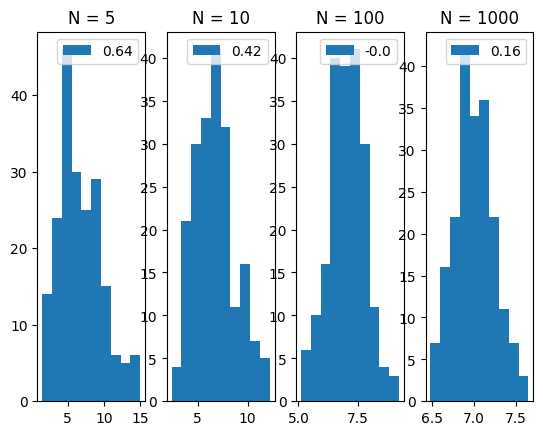

In [194]:
fig,ax = plt.subplots(1,4)

ax[0].hist(estim_5, label = f"{round(skewness(estim_5),2)}")
ax[1].hist(estim_10, label = f"{round(skewness(estim_10),2)}")
ax[2].hist(estim_100, label = f"{round(skewness(estim_100),2)}")
ax[3].hist(estim_1000, label = f"{round(skewness(estim_1000),2)}")

ax[0].set_title("N = 5")
ax[1].set_title("N = 10")
ax[2].set_title("N = 100")
ax[3].set_title("N = 1000")


ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()


plt.show()

In [245]:
estimator_distribution = estimators(N = 300, n= 160)

In [240]:
x,y = max_sez_aurea(dati,loglikelihood,t_range)

like = [likelihood(dati[:160],i)*1e201 for i in t_range]

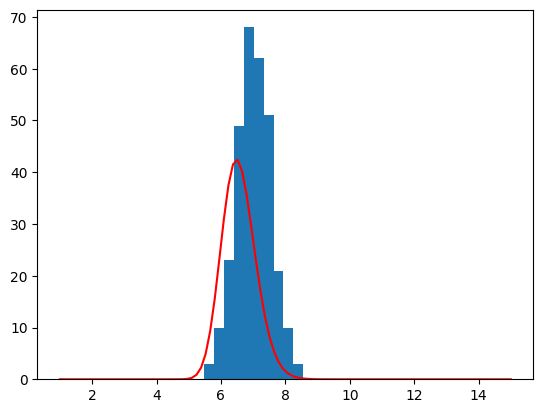

In [255]:
plt.hist(estimator_distribution)
plt.plot(t_range,like, 'r')
# plt.vlines(x=[x_max,zero1,zero2],ymin=0,ymax=50,linestyles='--' , color = 'r')
plt.show()

<h1>Asymptotic property
</h1>

In [ ]:
t_range = np.linspace(1,10,200) #range of t0 values

In [256]:
diff = []

for i in range(200):

    data = pdf(100,t0)

    x_max,y_max = max_sez_aurea(data,loglikelihood,t_range)

    sigma = x_max-zeros(loglikelihood,data,1,x_max)

    diff.append((x_max- t0)/sigma)


Skewness of the distribution:	 -0.6232488786971482


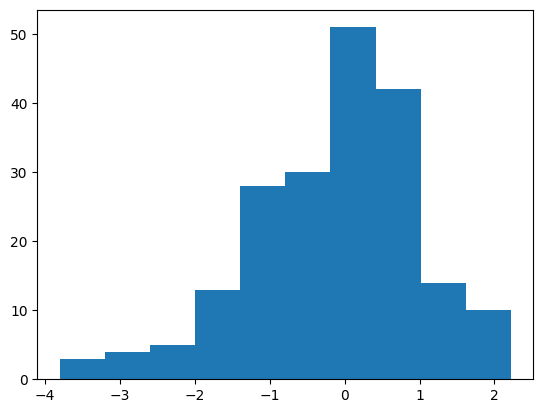

In [258]:
plt.hist(diff)
print("Skewness of the distribution:\t",skewness(diff))
plt.show()